## Computer Vision & Image Processing: **Image Transformation and Interpolation in Python**

*Submitted by:*

**Christian Elijah Darvin**

BCS32

College of Information and Computer Studies - De La Salle University Dasmariñas

### Observations:

The experiment explored various image transformation techniques, including shear, perspective transformation, scaling, rotation, and interpolation methods. The transformations applied to the image successfully demonstrated geometric modifications, with shear distortions shifting the image along the X and Y axes. Perspective transformation altered the viewing angle, creating a warping effect. The interpolation techniques, such as nearest-neighbor, bilinear, and bicubic, impacted image quality during resizing, with bicubic providing smoother results compared to nearest-neighbor, which introduced blocky artifacts.

Bicubic interpolation is a method used in image processing to resize images while maintaining smooth transitions and minimizing artifacts. It is an improvement over bilinear interpolation and is particularly useful when upscaling images. I noticed that when using bicubic interpolation, the image appeared more compact without being cropped.

In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv

print(f"NumPy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"OpenCV Version: {cv.__version__}")

NumPy Version: 2.1.1
Matplotlib Version: 3.10.0
OpenCV Version: 4.11.0


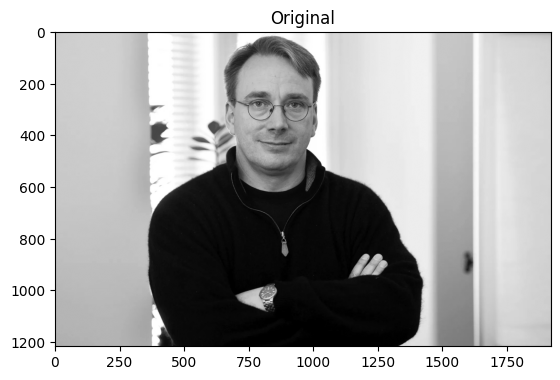

In [50]:
linus_torvalds_img = cv.imread("./images/Cohen-Linus-Torvalds.png", 0)
plt.imshow(linus_torvalds_img, cmap="gray")
plt.title("Original")
plt.show()

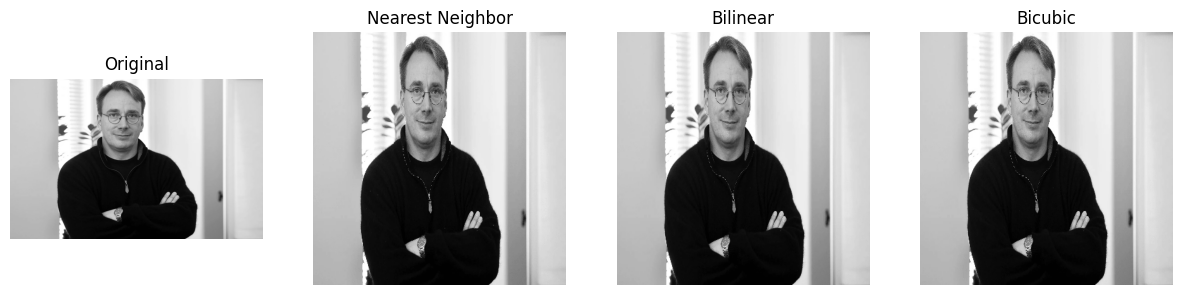

In [ ]:
methods = {
    "Nearest Neighbor": cv.INTER_NEAREST,
    "Bilinear": cv.INTER_LINEAR,
    "Bicubic": cv.INTER_CUBIC,
}

new_size = (400, 400)
plt.figure(figsize=(15, 8))  

# Display original image
plt.subplot(2, 4, 1)
plt.imshow(cv.cvtColor(linus_torvalds_img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

# Apply interpolation methods
for idx, (method_name, method) in enumerate(methods.items(), start=2):
    resized_img = cv.resize(linus_torvalds_img, new_size, interpolation=method)

    plt.subplot(2, 4, idx)  # 2 rows, 4 columns
    plt.imshow(cv.cvtColor(resized_img, cv.COLOR_BGR2RGB))
    plt.title(method_name)
    plt.axis("off")


reflected_image = cv.flip(linus_torvalds_img, 1)

In [52]:
# Image transformations
scale_factor = 1.5
scaled_dim = (
    int(linus_torvalds_img.shape[1] * scale_factor),
    int(linus_torvalds_img.shape[0] * scale_factor),
)
scaled_img = cv.resize(linus_torvalds_img, scaled_dim)

center = (linus_torvalds_img.shape[1] // 2, linus_torvalds_img.shape[0] // 2)
rotation_matrix = cv.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv.warpAffine(
    linus_torvalds_img,
    rotation_matrix,
    (linus_torvalds_img.shape[1], linus_torvalds_img.shape[0]),
)

translation_matrix = np.float32([[1, 0, 100], [0, 1, 100]])
translated_image = cv.warpAffine(
    linus_torvalds_img,
    translation_matrix,
    (linus_torvalds_img.shape[1], linus_torvalds_img.shape[0]),
)

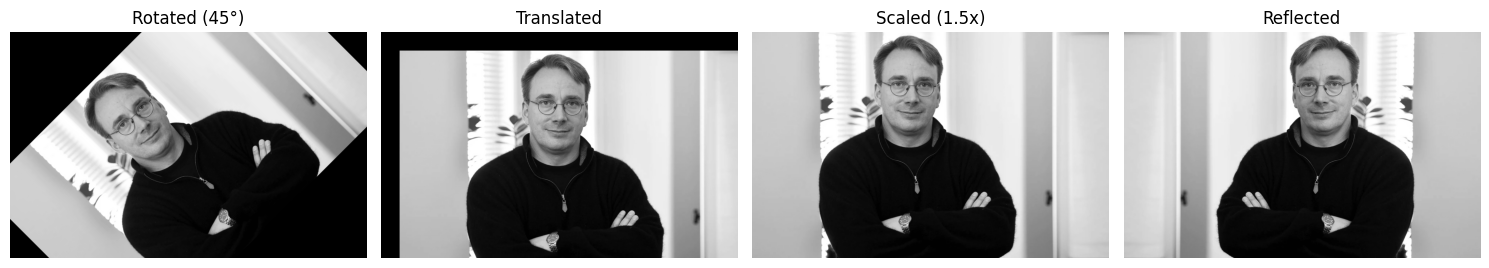

In [53]:
plt.figure(figsize=(15, 8))  # Increase figure size

# Display transformations
plt.subplot(2, 4, 5)
plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotated (45°)")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(cv.cvtColor(translated_image, cv.COLOR_BGR2RGB))
plt.title("Translated")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(cv.cvtColor(scaled_img, cv.COLOR_BGR2RGB))
plt.title("Scaled (1.5x)")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(cv.cvtColor(reflected_image, cv.COLOR_BGR2RGB))
plt.title("Reflected")
plt.axis("off")

plt.tight_layout()
plt.show()

In [54]:
height, width = linus_torvalds_img.shape[:2]


# Apply Shear X and Shear Y transformations
def shear_linus_torvalds_img(linus_torvalds_img, shear_factor_x=0, shear_factor_y=0):
    shear_matrix_x = np.float32([[1, shear_factor_x, 0], [0, 1, 0]])
    shear_x = cv.warpAffine(
        linus_torvalds_img,
        shear_matrix_x,
        (width + int(shear_factor_x * height), height),
    )

    shear_matrix_y = np.float32([[1, 0, 0], [shear_factor_y, 1, 0]])
    shear_y = cv.warpAffine(
        linus_torvalds_img,
        shear_matrix_y,
        (width, height + int(shear_factor_y * width)),
    )

    return shear_x, shear_y


shear_x_img, shear_y_img = shear_linus_torvalds_img(
    linus_torvalds_img, shear_factor_x=0.3, shear_factor_y=0.3
)

# Define source and destination points for perspective transformation
src_points = np.float32(
    [[0, 0], [width - 1, 0], [0, height - 1], [width - 1, height - 1]]
)

dst_points = np.float32(
    [
        [0, 0],
        [width - 1, 0],
        [int(0.2 * width), height - 1],
        [int(0.8 * width), int(0.8 * height)],
    ]
)

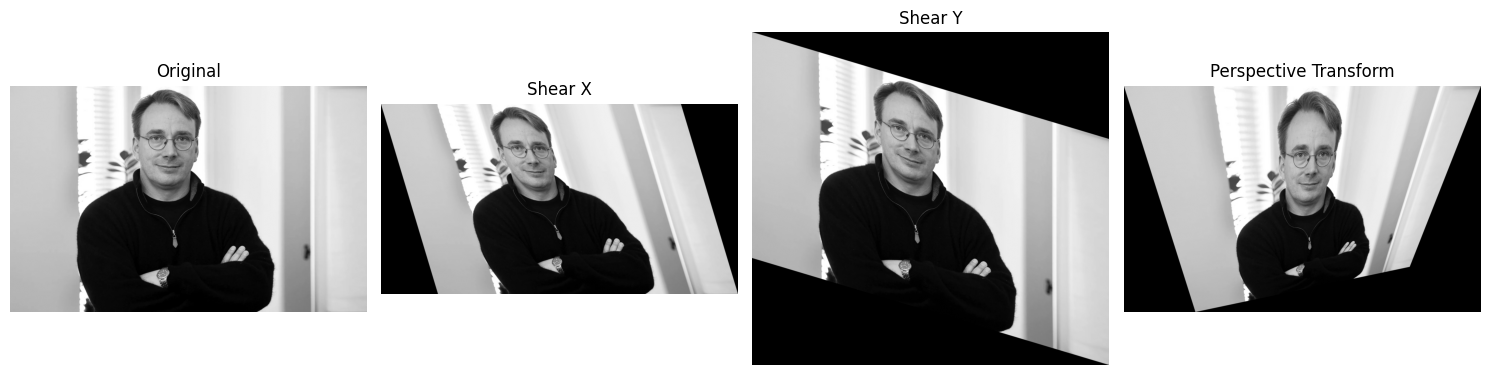

In [55]:
perspective_matrix = cv.getPerspectiveTransform(src_points, dst_points)
perspective_img = cv.warpPerspective(
    linus_torvalds_img, perspective_matrix, (width, height)
)

# Display linus_torvalds_imgs in a single column with 4 rows
plt.figure(figsize=(15, 8))

plt.subplot(1, 4, 1)
plt.imshow(linus_torvalds_img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(shear_x_img, cmap="gray")
plt.title("Shear X")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(shear_y_img, cmap="gray")
plt.title("Shear Y")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(perspective_img, cmap="gray")
plt.title("Perspective Transform")
plt.axis("off")

plt.tight_layout()
plt.show()